# Explore here

In [1]:
from sklearn.datasets import load_breast_cancer
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.metrics import *
from imblearn.metrics import specificity_score
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [2]:
# VER BASE DE DATOS:

df_diabetes = pd.read_csv('../data/raw/diabetes.csv')
df_diabetes

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [3]:
df_diabetes.shape

(768, 9)

In [4]:
df_diabetes['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [5]:
df_diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
df_diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Al observar que los datos mínimos de prácticamente todos los valores es 0. Vamos a eliminar todos los datos cuyo valor sea 0. Excepto en "embarazos" ya que no tienen porqué todas tener hijos, por lo que el valor mínimo puede ser 0. Sin embargo en la "glucosa", la "presión arterial", el "Grosor del pliegue cutáneo del tríceps" o el "índice de masa muscular" no pueden ser 0, por lo tanto esos son valores nulos que debemos eliminar. 

In [7]:
# ELIMINAR VALORES 0:

df_diabetes.drop(df_diabetes[(df_diabetes['Glucose'] == 0) |
                             (df_diabetes['BloodPressure'] == 0) |
                             (df_diabetes['SkinThickness'] == 0) |
                             (df_diabetes['Insulin'] == 0) |
                             (df_diabetes['BMI'] == 0)].index, inplace=True)

df_diabetes



,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
6,3,78,50,32,88,31.0,0.248,26,1
8,2,197,70,45,543,30.5,0.158,53,1
13,1,189,60,23,846,30.1,0.398,59,1
...,...,...,...,...,...,...,...,...,...
753,0,181,88,44,510,43.3,0.222,26,1
755,1,128,88,39,110,36.5,1.057,37,1
760,2,88,58,26,16,28.4,0.766,22,0
763,10,101,76,48,180,32.9,0.171,63,0


In [8]:
df_diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,3.301020,122.627551,70.663265,29.145408,156.056122,33.086224,0.523046,30.864796,0.331633
std,3.211424,30.860781,12.496092,10.516424,118.841690,7.027659,0.345488,10.200777,0.471401
min,0.000000,56.000000,24.000000,7.000000,14.000000,18.200000,0.085000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,21.000000,76.750000,28.400000,0.269750,23.000000,0.000000
50%,2.000000,119.000000,70.000000,29.000000,125.500000,33.200000,0.449500,27.000000,0.000000
75%,5.000000,143.000000,78.000000,37.000000,190.000000,37.100000,0.687000,36.000000,1.000000
max,17.000000,198.000000,110.000000,63.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [9]:
df_diabetes.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

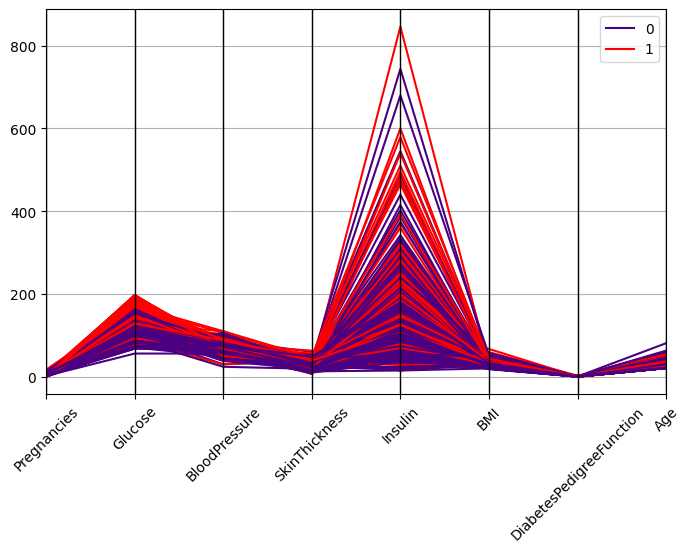

In [10]:
# VISUALIZACIÓN PARALELA DE LOS DATOS ORIGINALES:

plt.figure(figsize=(8, 5))
pd.plotting.parallel_coordinates(df_diabetes, 'Outcome', color=['indigo', 'red'])
plt.xticks(rotation=45)
plt.show()


In [11]:
# DATOS ESCALADOS:

df_diabetes = df_diabetes.reset_index(drop=True)

data_sc = pd.DataFrame(StandardScaler().fit_transform(df_diabetes.drop('Outcome', axis=1)), columns=df_diabetes.columns[:-1])
data_sc['Outcome'] = df_diabetes['Outcome']
data_sc

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,-0.717427,-1.091046,-0.373655,-0.585110,-0.522842,-0.710421,-1.031876,-0.968299,0
1,-1.029213,0.466314,-2.456964,0.557421,0.100631,1.426730,5.115111,0.209585,1
2,-0.093854,-1.447941,-1.655691,0.271788,-0.573394,-0.297238,-0.797126,-0.477514,1
3,-0.405640,2.413014,-0.053146,1.509530,3.260122,-0.368477,-1.057960,2.172726,1
4,-0.717427,2.153454,-0.854419,-0.585110,5.812990,-0.425468,-0.362402,2.761668,1
...,...,...,...,...,...,...,...,...,...
387,-1.029213,1.893894,1.389146,1.414319,2.982087,1.455225,-0.872478,-0.477514,1
388,-0.717427,0.174309,1.389146,0.938264,-0.388037,0.486384,1.547482,0.602213,1
389,-0.405640,-1.123491,-1.014673,-0.299477,-1.180016,-0.667678,0.704119,-0.870142,0
390,2.088650,-0.701706,0.427618,1.795162,0.201735,-0.026533,-1.020284,3.154296,0


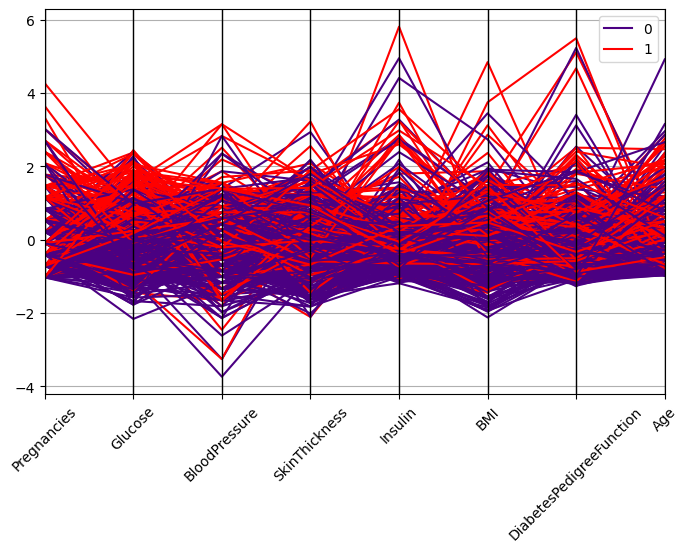

In [12]:
# VISUALIZACIÓN DE DATOS ESCALADOS:

plt.figure(figsize=(8, 5))
pd.plotting.parallel_coordinates(data_sc, 'Outcome', color=['indigo', 'red'])
plt.xticks(rotation=45)
plt.show()

In [13]:
# DIVISIÓN DE LOS DATOS:

X = df_diabetes.drop('Outcome', axis=1)
y = df_diabetes['Outcome']

X, y

(     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
 0              1       89             66             23       94  28.1   
 1              0      137             40             35      168  43.1   
 2              3       78             50             32       88  31.0   
 3              2      197             70             45      543  30.5   
 4              1      189             60             23      846  30.1   
 ..           ...      ...            ...            ...      ...   ...   
 387            0      181             88             44      510  43.3   
 388            1      128             88             39      110  36.5   
 389            2       88             58             26       16  28.4   
 390           10      101             76             48      180  32.9   
 391            5      121             72             23      112  26.2   
 
      DiabetesPedigreeFunction  Age  
 0                       0.167   21  
 1                    

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

ENTRENAMIENTO DE MODELOS:

In [15]:
# ÁRBOL SIMPLE:

simple_tree = DecisionTreeClassifier(max_depth=3, max_features=X_train.shape[1]//2, min_samples_leaf=20, min_samples_split=30, random_state=42)
simple_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, max_features=4, min_samples_leaf=20,
                       min_samples_split=30, random_state=42)

In [16]:
# ÁRBOL COMPLEJO:

complex_tree = DecisionTreeClassifier(max_depth=100, min_samples_leaf=1, random_state=42)
complex_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=100, random_state=42)

VISUALIZACIÓN DE LOS ÁRBOLES:

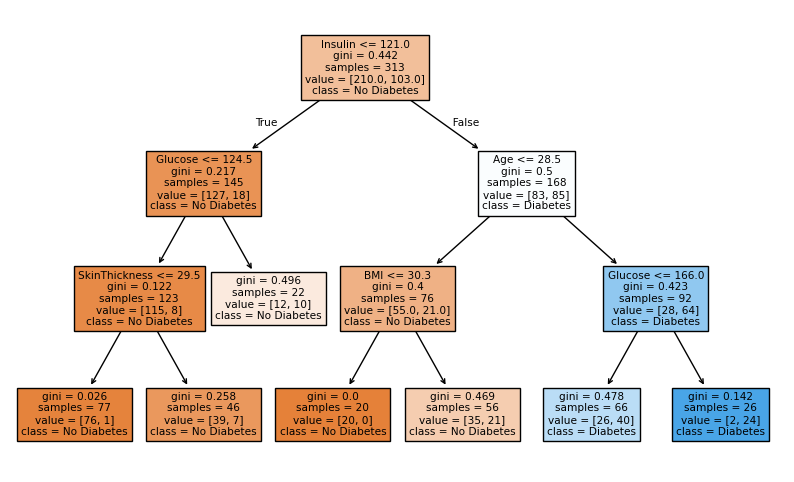

In [17]:
# VISUALIZACIÓN ÁRBOL SIMPLE:

plt.figure(figsize=(10, 6))
plot_tree(simple_tree, feature_names=X_train.columns, class_names=['No Diabetes', 'Diabetes'], filled=True)
plt.show()

In [18]:
X_train[(X_train['Glucose'] > 16.795) & (X_train['BMI'] <= 0.073)]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age


In [19]:
# REPRESENTACIÓN TEXTUAL DEL ÁRBOL:

text_representation = export_text(simple_tree, feature_names=list(X_train.columns))
print(text_representation)

|--- Insulin <= 121.00
|   |--- Glucose <= 124.50
|   |   |--- SkinThickness <= 29.50
|   |   |   |--- class: 0
|   |   |--- SkinThickness >  29.50
|   |   |   |--- class: 0
|   |--- Glucose >  124.50
|   |   |--- class: 0
|--- Insulin >  121.00
|   |--- Age <= 28.50
|   |   |--- BMI <= 30.30
|   |   |   |--- class: 0
|   |   |--- BMI >  30.30
|   |   |   |--- class: 0
|   |--- Age >  28.50
|   |   |--- Glucose <= 166.00
|   |   |   |--- class: 1
|   |   |--- Glucose >  166.00
|   |   |   |--- class: 1



FUNCIONES MÉTRICAS:

In [20]:
def get_metrics(y_train, y_test, y_pred_train, y_pred_test):
    # Calcular métricas para el conjunto de entrenamiento
    train_accuracy = accuracy_score(y_train, y_pred_train)
    train_f1 = f1_score(y_train, y_pred_train)
    train_auc = roc_auc_score(y_train, y_pred_train)
    train_precision = precision_score(y_train, y_pred_train)
    train_recall = recall_score(y_train, y_pred_train)
    train_specificity = specificity_score(y_train, y_pred_train)

    # Calcular métricas para el conjunto de prueba
    test_accuracy = accuracy_score(y_test, y_pred_test)
    test_f1 = f1_score(y_test, y_pred_test)
    test_auc = roc_auc_score(y_test, y_pred_test)
    test_precision = precision_score(y_test, y_pred_test)
    test_recall = recall_score(y_test, y_pred_test)
    test_specificity = specificity_score(y_test, y_pred_test)

    # Calcular la diferencia entre métricas de entrenamiento y prueba
    diff_accuracy = train_accuracy - test_accuracy
    diff_f1 = train_f1 - test_f1
    diff_auc = train_auc - test_auc
    diff_precision = train_precision - test_precision
    diff_recall = train_recall - test_recall
    diff_specificity = train_specificity - test_specificity

    # Crear un DataFrame con los resultados
    metrics_df = pd.DataFrame([[train_accuracy, train_f1, train_auc, train_precision, train_recall, train_specificity],[test_accuracy, test_f1, test_auc, test_precision, test_recall, test_specificity],[diff_accuracy, diff_f1, diff_auc, diff_precision, diff_recall, diff_specificity]],
                              columns = ['Accuracy', 'F1', 'AUC', 'Precision', 'Recall', 'Specificity'],
                              index = ['Train','Test', 'Diferencia'])

    return metrics_df

In [21]:
# EVALUACIÓN DE MODELOS:

# Evaluar el modelo complejo en entrenamiento y prueba
train_pred_complex = complex_tree.predict(X_train)
test_pred_complex = complex_tree.predict(X_test)

# Evaluar el modelo simple en entrenamiento y prueba
train_pred_simple = simple_tree.predict(X_train)
test_pred_simple = simple_tree.predict(X_test)

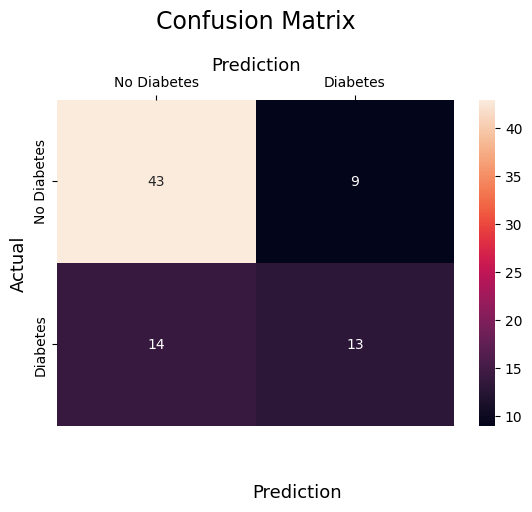

In [22]:
# MATRIZ DE CONFUSIÓN:

cm = confusion_matrix(y_test,test_pred_complex)
sns.heatmap(cm,
            annot=True,
            fmt='g',
            xticklabels=['No Diabetes', 'Diabetes'],
            yticklabels=['No Diabetes', 'Diabetes'])
plt.ylabel('Actual', fontsize=13)
plt.title('Confusion Matrix', fontsize=17, pad=20)
plt.gca().xaxis.set_label_position('top')
plt.xlabel('Prediction', fontsize=13)
plt.gca().xaxis.tick_top()

plt.gca().figure.subplots_adjust(bottom=0.2)
plt.gca().figure.text(0.5, 0.05, 'Prediction', ha='center', fontsize=13)
plt.show()

El modelo acertó 37 veces cuando dijo que no hay diabetes, y acertó 14 veces cuando dijo que sí hay diabetes, también se equivocó 9 veces diciendo que había diabetes cuando no la había, y 8 veces diciendo que no había cuando sí había.

MÉTRICAS FINALES:

In [23]:
# Métricas del modelo complejo
get_metrics(y_train, y_test, train_pred_complex, test_pred_complex)
print("Árbol Complejo:")
print(get_metrics(y_train, y_test, train_pred_complex, test_pred_complex))

# Métricas del modelo simple
get_metrics(y_train, y_test, train_pred_simple, test_pred_simple)
print("Árbol Simple:")
print(get_metrics(y_train, y_test, train_pred_simple, test_pred_simple))

Árbol Complejo:
            Accuracy        F1       AUC  Precision    Recall  Specificity
Train       1.000000  1.000000  1.000000   1.000000  1.000000     1.000000
Test        0.708861  0.530612  0.654202   0.590909  0.481481     0.826923
Diferencia  0.291139  0.469388  0.345798   0.409091  0.518519     0.173077
Árbol Simple:
            Accuracy        F1       AUC  Precision    Recall  Specificity
Train       0.785942  0.656410  0.744013   0.695652  0.621359     0.866667
Test        0.759494  0.595745  0.701567   0.700000  0.518519     0.884615
Diferencia  0.026449  0.060666  0.042446  -0.004348  0.102841    -0.017949


ÁRBOL COMPLEJO:

En entrenamiento acierta todo, pero en test baja mucho: parece que se ha aprendido los datos de memoria.Tiene mucha diferencia entre train y test, lo que indica sobreajuste (no generaliza bien).

ÁRBOL SIMPLE:

Rinde parecido en entrenamiento y test, sin grandes diferencias. Aunque la precisión total es un poco menor, es más estable y generaliza mejor.

CONCLUSIÓN:

Aunque el árbol complejo tiene mejores resultados en entrenamiento, no generaliza bien a nuevos datos. En cambio, el árbol simple ofrece un rendimiento más equilibrado y estable, por lo que es la mejor opción para predecir correctamente casos nuevos sin hacer trampas con los datos.